In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import GeneticAlgorithmState
from src.baseline import BaselineGeneticAlgorithm
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 1000
DIMENSION_SIZE = 2
CONSTRAINTS = (-10, 10)
RANDOM_STATE = 100

In [3]:
current_state = GeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

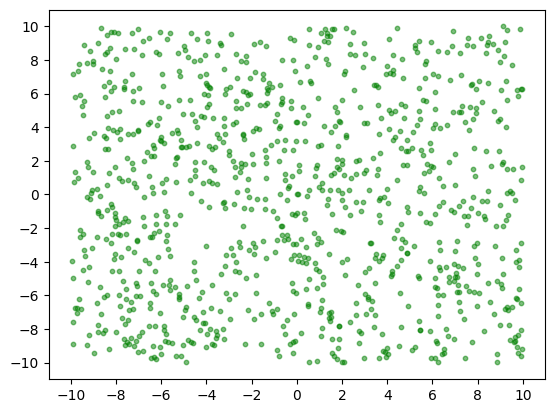

In [4]:
x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [5]:
from typing import Sequence


def b1_function(pop: Sequence[float]):
    x = pop[0]
    y = pop[1]

    first = np.exp(np.abs(100 - np.sqrt(x ** 2 + y ** 2) / np.pi))
    value = -0.0001 * (np.abs(np.sin(x) * np.sin(y) * first) + 1) ** (0.1)
    return value

b1_function([3, 5])

-1.4978726747609756

In [6]:
algo = BaselineGeneticAlgorithm(
    state=current_state,
    eval_functions=[b1_function],
    mutation_function=square_mutation,
    mating_function=np.mean,
)

In [7]:
algo.get_best()

array([[1.50484864, 1.17820735]])

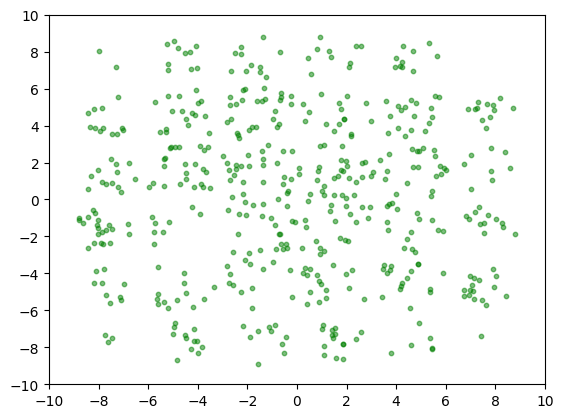

In [8]:
algo.select(keep_share=0.5)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

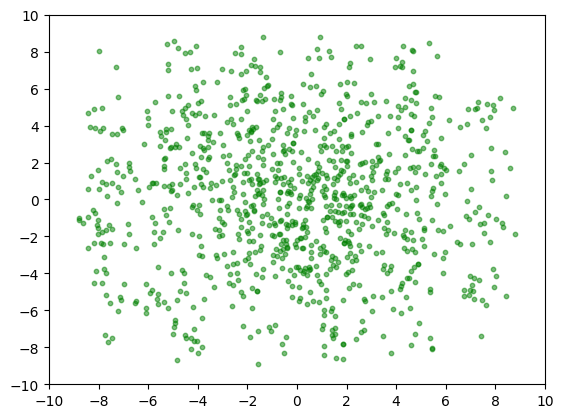

In [9]:
algo.mate()

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

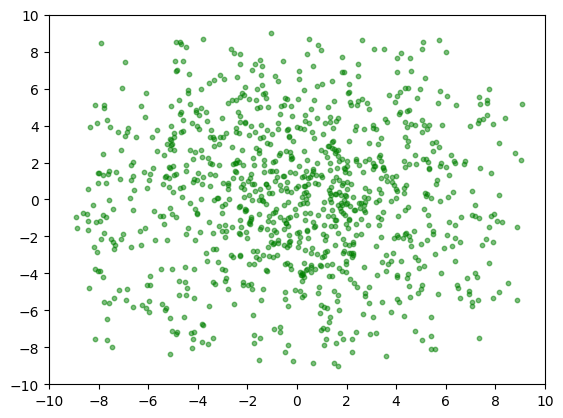

In [10]:
algo.mutate(delta=0.5)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [11]:
algo.get_best()

array([[ 1.37969247, -1.4530333 ]])

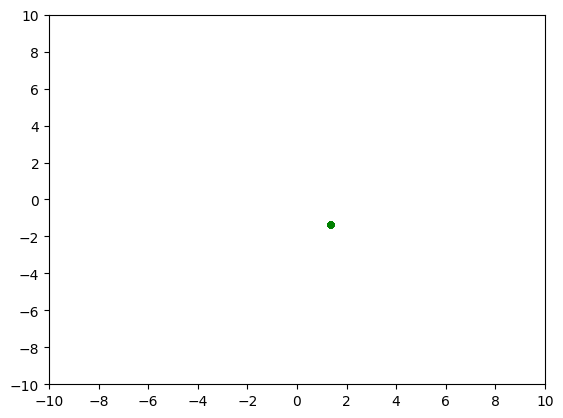

In [12]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [13]:
algo.get_best()

array([[ 1.3494424 , -1.34927323]])